# وَأَن لَّيْسَ لِلْإِنسَانِ إِلَّا مَا سَعَىٰ (39) وَأَنَّ سَعْيَهُ سَوْفَ يُرَىٰ (40) ثُمَّ يُجْزَاهُ الْجَزَاءَ الْأَوْفَىٰ 


In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [341]:
file=pd.read_csv(r"C:\Users\User.DESKTOP-OQ6NE4T\Desktop\Obesity Prediction\Obesity prediction.csv")

In [342]:
file

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Gender: Gender
Age: Age
Height : in metres
Weight : in kgs
family_history : Has a family member suffered or suffers from overweight?
FAVC : Do you eat high caloric food frequently?
FCVC : Do you usually eat vegetables in your meals?
NCP : How many main meals do you have daily?
CAEC : Do you eat any food between meals?
SMOKE : Do you smoke?
CH2O : How much water do you drink daily?
SCC : Do you monitor the calories you eat daily?
FAF: How often do you have physical activity?
TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?
CALC : How often do you drink alcohol?
MTRANS : Which transportation do you usually use?
Obesity_level (Target Column) : Obesity level

In [343]:
file

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [344]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [345]:
file.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [346]:
file['Gender']=file['Gender'].map({'Male':1,'Female':0})
file['family_history']=file['family_history'].map({'yes':1,'no':0})
file['FAVC']=file['FAVC'].map({'yes':1,'no':0})
file['SMOKE']=file['SMOKE'].map({'yes':1,'no':0})
file['SCC']=file['SCC'].map({'yes':1,'no':0})

In [347]:
file

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [348]:
file['CAEC'].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [349]:
file['New_CAEC']=file['CAEC'].map(file['CAEC'].value_counts())
file.drop(labels='CAEC',inplace=True,axis=1)

In [350]:
file['New_CALC']=file['CALC'].map(file['CALC'].value_counts())
file.drop(labels='CALC',axis=1,inplace=True)

In [351]:
file['New_MTRANS']=file['MTRANS'].map(file['MTRANS'].value_counts())
file.drop(axis=1,inplace=True,labels='MTRANS')

In [352]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
file[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','New_CAEC','New_CALC','New_MTRANS']]=scaler.fit_transform(file[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','New_CAEC','New_CALC','New_MTRANS']])

In [353]:
file['Obesity'].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [354]:
file['Obesity']=file['Obesity'].map({'Obesity_Type_I':1,'Obesity_Type_III':2,'Obesity_Type_II':3,'Overweight_Level_I':4,'Overweight_Level_II':5,'Normal_Weight':6,'Insufficient_Weight':7})

In [355]:
file

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,Obesity,New_CAEC,New_CALC,New_MTRANS
0,0,0.148936,0.320755,0.186567,1,0,0.5,0.666667,0,0.500000,0,0.000000,1.000000,6,1.0,0.455714,1.000000
1,0,0.148936,0.132075,0.126866,1,0,1.0,0.666667,1,1.000000,1,1.000000,0.000000,6,1.0,1.000000,1.000000
2,1,0.191489,0.660377,0.283582,1,0,0.5,0.666667,0,0.500000,0,0.666667,1.000000,6,1.0,0.049286,1.000000
3,1,0.276596,0.660377,0.358209,0,0,1.0,0.666667,0,0.500000,0,0.666667,0.000000,4,1.0,0.049286,0.031151
4,1,0.170213,0.622642,0.379104,0,0,0.5,0.000000,0,0.500000,0,0.000000,0.000000,5,1.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0.148443,0.491943,0.689616,1,1,1.0,0.666667,0,0.364070,0,0.558756,0.906247,2,1.0,1.000000,1.000000
2107,0,0.169850,0.563366,0.707037,1,1,1.0,0.666667,0,0.502565,0,0.447130,0.599270,2,1.0,1.000000,1.000000
2108,0,0.181362,0.570200,0.706637,1,1,1.0,0.666667,0,0.527097,0,0.471403,0.646288,2,1.0,1.000000,1.000000
2109,0,0.220467,0.546132,0.704079,1,1,1.0,0.666667,0,0.926170,0,0.379702,0.586035,2,1.0,1.000000,1.000000


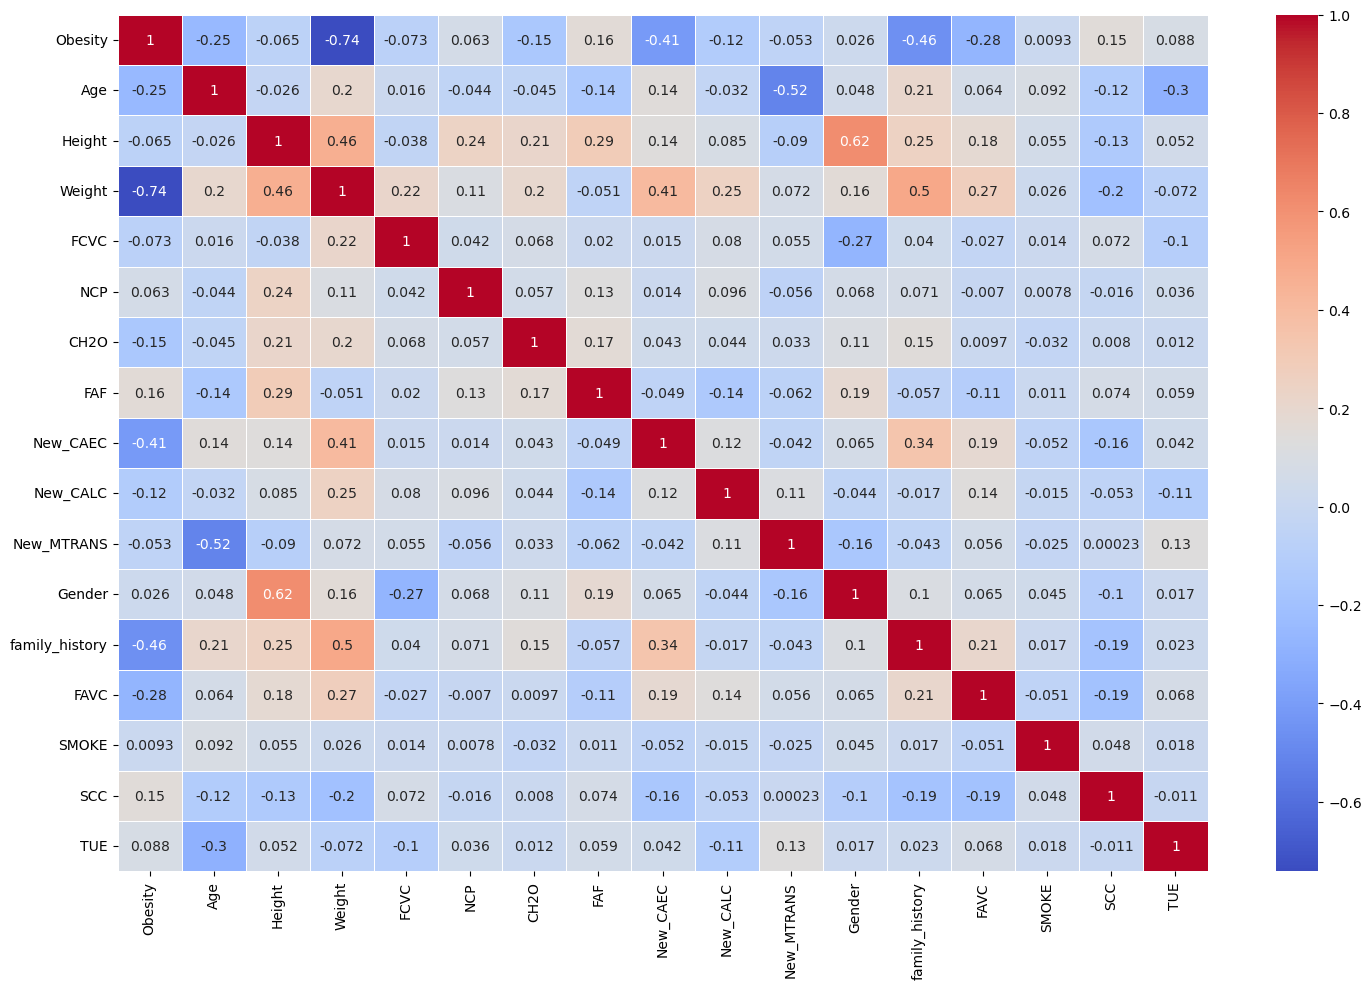

In [356]:

fig, axes = plt.subplots(1,1, figsize=(15, 10)) 
sns.heatmap(file[['Obesity','Age','Height','Weight','FCVC','NCP','CH2O','FAF','New_CAEC','New_CALC','New_MTRANS','Gender','family_history','FAVC','SMOKE','SCC','TUE']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.tight_layout()
plt.show()

In [357]:
labels=file['Obesity']
features=file.drop(labels=['Obesity','TUE','Gender','New_MTRANS','SMOKE'],axis=1)

In [358]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.6,random_state=100)

In [359]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 
    'degree': [2, 3, 4, 5], 
    'kernel': ['rbf', 'poly']  
}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)  

print("Best Parameters:", grid_search.best_params_)

best_svm = grid_search.best_estimator_
accuracy = best_svm.score(x_test, y_test)
print("Test Accuracy:", accuracy)


Best Parameters: {'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Test Accuracy: 0.9234411996842936


In [360]:
from sklearn import svm
SVC_model_1=svm.SVC(C=100,gamma=1,degree=2,kernel='poly',max_iter=2000)

In [361]:
SVC_model_1.fit(x_train,y_train)

c:\Users\User.DESKTOP-OQ6NE4T\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=100, degree=2, gamma=1, kernel='poly', max_iter=2000)

In [362]:
SVC_model_1_predictions=SVC_model_1.predict(x_test)

In [363]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [364]:
accuracy=accuracy_score(y_test,SVC_model_1_predictions)

In [366]:
print(classification_report(y_test,SVC_model_1_predictions))
print("Accuracy = ",accuracy)

conf_matrix=confusion_matrix(y_test,SVC_model_1_predictions)




              precision    recall  f1-score   support

           1       0.93      0.97      0.95       213
           2       1.00      1.00      1.00       192
           3       0.99      0.95      0.97       174
           4       0.87      0.86      0.87       176
           5       0.89      0.92      0.90       177
           6       0.86      0.84      0.85       163
           7       0.95      0.93      0.94       172

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

Accuracy =  0.9281767955801105
